# Übung 8

**Gruppenname:**

*KSWS*

### Hinweise
* Nutzen Sie für die folgenden Aufgaben **nur** die Mittel, die Ihnen Numpy und Matplotlib zur Verfügung stellt.

### In dieser Übung ...

... werden wir uns mit K-Means Clustering vertraut machen. Wir werden K-Means Clustern implementieren (Übung 8.1).

<font color='red'>Installation: <br>
Dieses Notebook nutzt Ressourcen und Module und erwartet die im Zip Ordner vorgegebene Paketstruktur.<br>
- KSWS-8 
    - Ressources
    - src
        - ML_Modules
            - DataAnalysis
        - KSWS-8.ipynb
                      
</font>

### 8.1 K-Means

In der Vorlesung haben Sie K-Means als eine klassische Clustering-Methode kennengelernt. Sie werden Ihr Wissen über den K-Means Algorithmus durch diese Übung vertiefen. Nutzen Sie für die Implementierung Befehle der Numpy-Bibliothek.

**Ihre Aufgaben**

(1) Schlagen Sie in den Vorlesungsfolien den K-Means Algorithmus nach.

(2) Ich habe Ihnen synthetische Daten zur Übung bereitgestellt. Bitte führen Sie die unten stehende Code-Zelle aus. Sie erzeugt 100 Datenpunkte mit je zwei Features (Merkmalen, Array **X**), organisiert in drei Cluster. Die Clusterzugehörigkeiten sind im Vektor **y** kodiert.

In [1]:
# Load Data
import numpy as np
from sklearn.datasets import make_blobs
from matplotlib import pyplot as plt

# generate data
X, y = make_blobs(n_samples=100, n_features=2, centers=3,
                  random_state=1)

(3) [Visualisieren Sie](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html) die Daten in einem Scatterplot und färben Sie die Cluster gemäß ihrer Clusterzugehörigkeit ein.

In [2]:
# Describe Data
from ML_Modules.DataAnalysis.Analyse import *
punkte, feature = describe_feature_v(X)

Anzahl Datenpunkte/Messungen :100
Anzahl Features: 2


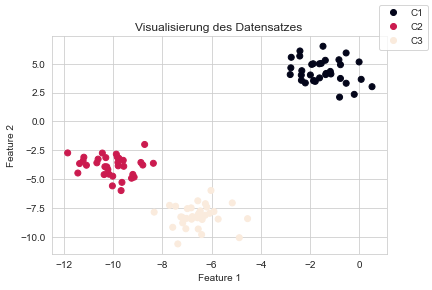

In [3]:
# Show Data
from ML_Modules.DataAnalysis.visualise import *
_ = plot_2dim_set(X, y, label_names=["C1", "C2", "C3"])

(4) Die Anzahl der Cluster sei $K=3$. Implementieren Sie Schritt 1 des K-Means Algorithmus, also die zufällige Zuweisung von Datenpunkten zu den $K$ Clustern. [Dies hier](https://numpy.org/doc/stable/reference/random/generated/numpy.random.randint.html) kann Ihnen dabei hilfreich sein.

>Siehe (6)

(5) Visualisieren Sie in einem Scatterplot die Daten und färben Sie die Datenpunkte gemäß Ihrer aus Schritt (4) ermittelten zufälligen Clusterzugehörigkeit ein.

>Siehe (6)

(6) Implementieren Sie nun die Iterationsschritte 2a und 2b, also die Bestimmung der Clusterzentren (geometrische Schwerpunkte) sowie die Neuzuordnung der Datenpunkte zu demjenigen Cluster, zu dem die Entfernung zum Schwerpunkt des Clusters am kleinsten ist. Nutzen Sie dabei als Distanzmaß den euklidischen Abstand. Eventuell können Ihnen diese Funktionen dabei hilfreich sein: [np.argmin](https://docs.scipy.org/doc/numpy/reference/generated/numpy.argmin.html), [np.unique](https://docs.scipy.org/doc/numpy/reference/generated/numpy.unique.html).
* Für diesen Schritt benötigen Sie vermutlich etwas länger Zeit. Nehmen Sie sich diese Zeit.
* Prüfen Sie nach Schritt 2b, ob die Zuordnung von Datenpunkten zu Clustern tatsächlich alle Cluster enthält. Falls etwa ein Cluster keine Datenpunkte mehr enthält, starten Sie die Prozedur von Schritt 1 an neu. Wir werden später auf die "Leere-Cluster-Problematik" eingehen.
* Es empfiehlt sich, Ihren Code - sobald er funktioniert - in eine Funktion namens `kmeans` zu schreiben, die die Daten $X$ sowie die Clusteranzahl $K$ entgegennimmt, und das Clusteringergebnis $y_\text{pred}$ ausgibt. Sie können dann im weiteren Verlauf dieser Übung einfach nur noch die Funktion `kmeans` aufrufen.

In [4]:
# Berechen centroid für jeden Cluster
def getCentroids(C_v,X):
    cluster_names = np.unique(C_v) 
    centroids     = np.zeros((len(cluster_names),2)) # platzhalter
    for idx,k in enumerate(cluster_names):
        x_k = X[C_v == k, :]
        centroids[idx] = x_k.mean(axis=0)

    return centroids

In [5]:
# Distanzen berechnen
def distance(p1,p2):
    return np.sqrt( np.sum( np.square(p1 - p2) ) )

def vec_equal(v1, v2):
    for idx, val in enumerate(v1):
        if( val != v2[idx]):
            return False

    return True    

In [6]:
# Kmeans
def kmeans_custom(X,k:int,show:bool=False):
    t = 100 # Sicherung endlosschleife
    # Zufallswerte für Cluster
    C_v           = np.random.randint(1,k+1,(punkte)) # Aufgabe 4
    if show:
        names = [str(name) for name in np.unique(C_v)]
        plot_2dim_set(X,C_v,label_names = names,title="Zufaellige zurodnung") # Aufgabe 5
    cluster_names = np.arange(1,k+1,1) 
    prevCluster   = np.zeros(C_v.shape)
 
# Test auf leere Cluster

    while np.any(prevCluster != C_v):
        if( t <= 0):
            raise Exception("Anzahl an zulässigen Iterationen überschritten")      
        for k in set(cluster_names).difference(set(C_v)): # Aufgabe 8
            C_v[ np.random.randint(0, len(C_v)) ] = k # ggf wird ein element zweimal genutzt,
            # sonst choice nutzen

        centroids   = getCentroids(C_v, X)
        prevCluster = C_v.copy()

        t -= 1
        for i, x in enumerate(X):
            dists  = [distance(center, x) for center in centroids]
            C_v[i] = cluster_names[np.argmin(dists)]  
        if show:
            plot_2dim_set(X,C_v,label_names = names,title=f"Iteration {100-t}")
     

    return C_v, t
    

(7) Führen Sie nun mit Ihrer Implementierung K-Means auf den Daten aus ($K=3$). Visualisieren Sie die Daten in einem Scatterplot und färben Sie sie gemäß der durch K-Means ermittelten Clusterzugehörigkeiten ein. Vergleichen Sie Ihren Plot mit dem aus Schritt (5).

Iterationen = 2


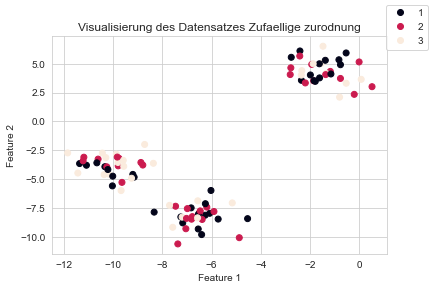

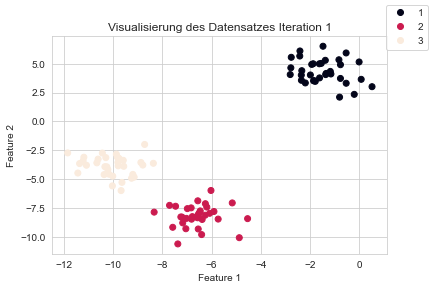

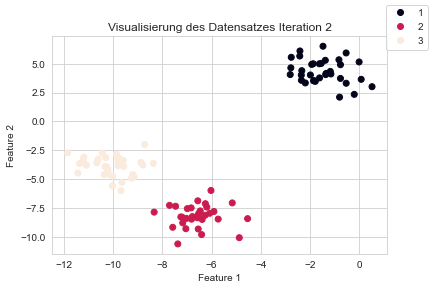

In [7]:
# Plot Kmeans
C_v,t = kmeans_custom(X,3,True) 
print(f"Iterationen = {100 - t}")

Sie haben im vorherigen Schritt gesehen, dass Sie mithilfe von K-Means Cluster im Datensatz identifizieren können. Nun geht es darum, Ihre Implementierung abzusichern, sodass Sie leeren Clustern, die während der Iterationen entstehen können, umgehen kann.

(8) Implementieren Sie vor Schritt 2a (also zu Beginn Ihrer Iteration) ein Verfahren, das überprüft, ob es Cluster gibt, die keine Datenpunkte enthalten. In diesem Falle wählen Sie einen zufälligen Datenpunkt aus und weisen ihn dem leeren Cluster zu. Dieser [Befehl](https://www.w3schools.com/python/ref_set_difference.asp) könnte Ihnen bei diesem Unterfangen hilfreich sein.

* Wie kann es dazu kommen, dass wir während der Iteration leere Cluster erhalten? Schauen Sie sich zur Erklärung das [hier](http://user.ceng.metu.edu.tr/~tcan/ceng465_f1314/Schedule/KMeansEmpty.html) verlinkte Beispiel an.
* Wenn Sie Schritt (8) fertig bearbeitet haben, entfernen Sie einfach den Neustart-Mechanismus, den Sie in Schritt (6) implementiert hatten. Sie brauchen diesen nicht mehr.

(9) Ermitteln Sie Cluster für $K=2, 3, 4, 5$ und visualisieren Sie sie (wie in Schritt 7) in Scatterplots. Was fällt Ihnen auf? (1-3 Sätze)

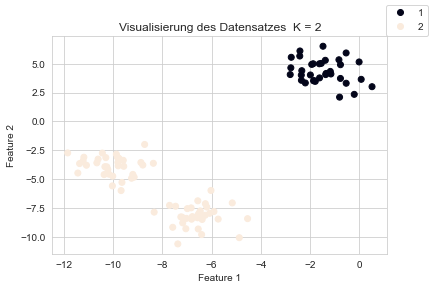

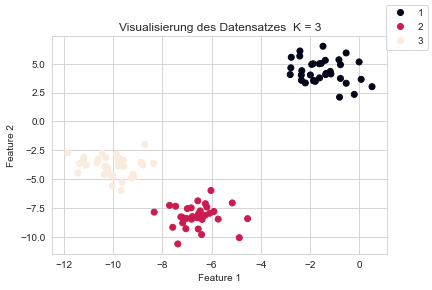

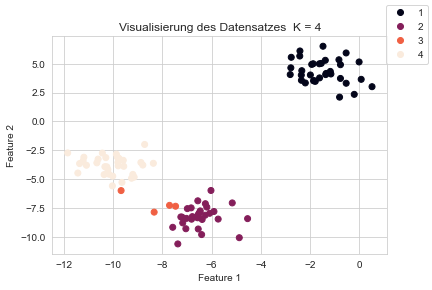

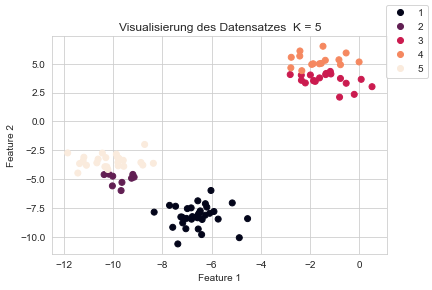

In [8]:
# Plot Kmeans End Results
k_arr = [2,3,4,5]
for k in k_arr:
    C_v,t = kmeans_custom(X,k)
    names = [str(name) for name in np.unique(C_v)]
    plot_2dim_set(X,C_v,label_names=names,title=f" K = {k}" )

(10) Ermitteln Sie für den unten erzeugten Datensatz mithilfe von K-Means $K=2$ Cluster und visualisieren Sie das Clusterergebnis (vergessen Sie nicht, die Punkte gemäß ihrer Clusterzugehörigkeit einzufärben).

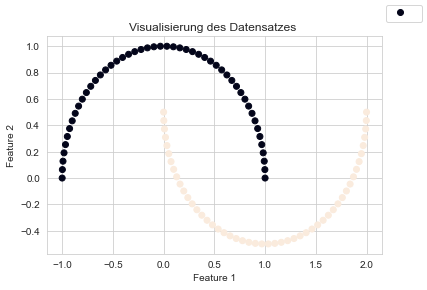

In [9]:
from sklearn.datasets import make_moons
[X2, y2] = make_moons(random_state=1)
_ = plot_2dim_set(X2,y2,label_names=[""])

(11) Erklären Sie, warum Sie im vorherigen Schritt nicht die Cluster erhalten, wie Sie sie für die Daten erwarten würden. Mit welchem anderen Clusteransatz könnten Sie eventuell die korrekten Cluster ermitteln? (3-6 Sätze).

Iterationen = 4


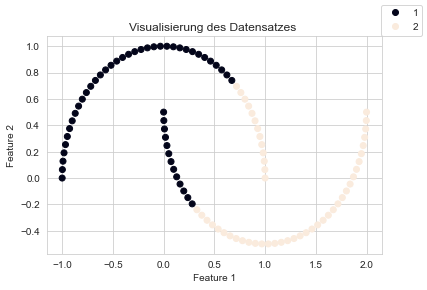

In [10]:
# Kmeans for moons
C_v,t = kmeans_custom(X2,2)
names = [str(name) for name in np.unique(C_v)]
plot_2dim_set(X2,C_v,label_names=names )
print(f"Iterationen = {100 - t}")

(12) \[Optional\] Schlagen Sie in den Vorlesungsfolien nach, wie die summierte Intra-Cluster-Variation $\sum_{k=1}^K W(C_k)$ definiert ist. Implementieren Sie eine Funktion `icv`, die die Daten $X$ sowie die Clusterzugehörigkeit $y$ entgegennimmt und Ihnen die summierte Intra-Cluster-Variation zurückgibt.

In [11]:
# Intra Cluster Variation
def icv(X,y):
    cluster_names = np.unique(y) # cluster names
    ICV = []
    sum = 0
    for cluster in cluster_names:
        X_C = X[y == cluster]
        tmpsum = 0
        for i1 in range(0,len(X_C)):
            for i2 in range(0,len(X_C)):
                tmpsum +=np.sum( np.square( X_C[i1] - X_C[i2] ))# np.sum(np.var(points,axis=0))

        tmpsum = tmpsum / len(X_C)
        sum += tmpsum

    return sum

(13) \[Optional\] Sie wissen aus der Vorlesung, dass K-Means Clustering-Ergebnisse liefern kann, die lokalen Minima in der Intra-Cluster-Variation entsprechen. Das erzielte Clustering hängt von der zufälligen Initialisierung der Clusterzugehörigkeiten in Schritt 1 des Algorithmus ab. Wir wollen nun erreichen, dass Ihre Implementierung von kmeans mehrfache ($n=20$) Clustering-Versuche mit unterschiedlichen zufälligen initialen Clusterzugehörigkeiten unternimmt und das Clustering mit der niedrigsten Intra-Cluster-Variation zurückliefert. Ändern Sie dementsprechend Ihre Funktion ab und implementieren Sie diese Funktionalität.

In [13]:
# Kmeans Erweitert
def kmeans_v2(X,k,n=20):

    C_v, _ = kmeans_custom(X,k)
    var    = icv(X,C_v)

    for i in range(1,n):     
        C_v_new, _ = kmeans_custom(X,k)
        var_new    = icv(X,C_v_new)

        if(var_new < var):
            C_v = C_v_new
            var = var_new

    return C_v, var

(14) \[Optional\] Bestimmen Sie mit Ihrer Funktion `icv` aus Schritt (12) die Intra-Cluster-Variation für $K=1, \ldots 8$ und tragen Sie diese Größe gegen $K$ in einem Plot auf.

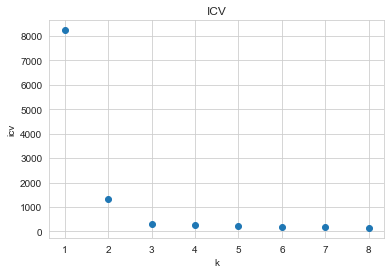

In [14]:
# Get icv
k_arr = np.arange(1,9,1)
var_arr =[]
for k in k_arr:
    _, var = kmeans_v2(X,k)
    var_arr.append(var)
    
fig,ax = plt.subplots(1)
ax.scatter(k_arr,var_arr)
_ = ax.set(title="ICV",xlabel="k",ylabel="icv")

(15) \[Optional\] Die "korrekte" Anzahl an Clustern (sofern es sie überhaupt gibt) ist notorisch schwierig zu bestimmen und Methoden, diese zu bestimmen, ist aktueller Forschungsgegenstand. Ein pragmatischer Ansatz ist es, sich die Intra-Cluster-Variation (ICV) als Funktion der Clusteranzahl $K$ zu plotten und das $K$ auszuwählen, zu dem die ICV gerade stark abgesunken ist. Betrachten Sie dazu Ihren Plot aus Schritt (13): Gibt es ein $K$, ab der die summierte Intra-Cluster-Variation stark sinkt? Geben Sie diesen Wert für $K$ an. Ist dieser Wert Ihrer Meinung nach sinnvoll?

> nach k = 3 ist die Steigung nur noch unmerklich vorhanden
d.h. k = 3 ist eine gute Wahl. Dies stimmt mit den Parametern bei der Datengenerierung ( k = 3) überein

Damit darf ich Ihnen gratulieren. Sie haben das K-Means-Clusteringverfahren intensiv durchdrungen. K-Means wird Ihnen in Data Science und Machine Learning Projekten oft begegnen.  

### 8.2 Bildkompression (mittels K-Means)

In dieser Übung werden Sie lernen, wie Sie mithilfe von K-Means ein einfaches Verfahren etablieren können, um Bilder zu komprimieren. 

**Das Verfahren:**

1. Sie starten mit einem Foto in 16 Millionen Farben (24 Bit). Die Farbe jedes Pixels wird durch einen Rot-, Grün- und Blauanteil kodiert (jeweils 8 Bit) und besteht daher aus einem Featurevektor der Länge 3.
2. Mithilfe von K-Means finden Sie in diesen Featurevektoren 16 Cluster und ihre 16 Clusterzentren.
3. Die Bildinformation lässt sich nun mithilfe der 16 Cluster sowie ihrer Clusterzentren darstellen. Für die Kodierung der Clusteridentität reichen 4 Bits ($2^4=16$ Cluster). Die assoziierten 16 verschiedenen Vektoren der Clusterzentren werden ebenfalls gespeichert.


**Ihre Daten**

- Foto: [https://data.bialonski.de/ds/eichhorn.png](https://data.bialonski.de/ds/eichhorn.png)

**Ihre Aufgaben**



(1) [Importieren](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imread.html) Sie die Daten in das Array `im`. Welche Dimensionen hat das Array? In welchen Dimensionen wird was kodiert?

In [ ]:
im : np.ndarray = plt.imread("..\\Ressources\\eichhorn.png")

<font color='green'>ANTWORT: <br>
0 und 1 sind eine Matrix, welche einen Intensitaetswert pro Pixel Codiert.
Es gibt eine dieser Matrizen für Rot, Gruen und Blau 
              
</font>

(2) [Visualisieren](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html) Sie die Daten im Array `im`.

In [ ]:
# Plot 
from mpl_toolkits.axes_grid1.axes_rgb import RGBAxes
fig = plt.figure()
fig.set_size_inches(10,10)
ax  = RGBAxes(fig, [0.1, 0.1, 0.8, 0.8], pad=0.0)
_ = ax.imshow_rgb(im[:,:,0], im[:,:,1], im[:,:,2])


(3) Transformieren Sie das Array `im` in ein neues Array `X` mit neuem *Shape*, sodass dieses Array nur noch 2 Dimensionen aufweist: In den Zeilen stehen die Datenpunkte (Pixel) und in den Spalten die Farbkodierung.

In [ ]:
# Reshape
X = im.reshape(16384,3)

In [ ]:
# show RGB Feature Space
from mpl_toolkits.mplot3d import Axes3D
%matplotlib widget

fig = plt.figure()
fig.set_size_inches(7,7)
ax = Axes3D(fig)
ax.scatter(X[:,0],X[:,1],X[:,2],s=1.5)
ax.set_xlabel('Rot')
ax.set_ylabel('Gruen')
ax.set_zlabel('Blau')

(4) Wenden Sie Ihren K-Means Algorithmus aus Übung 8.1 an, um 16 Cluster im Array `X` zu finden. Geben Sie außerdem auch die assoziierten Clusterzentren zurück.

* **Wichtig:** Wenn Sie Schwierigkeiten mit Ihrer Implementierung von K-Means haben, dann können Sie auch die Implementierung von [scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) benutzen.

In [ ]:
# Kmeans Scikit
from sklearn.cluster import KMeans

klusteranzahl = 16
kmeans = KMeans(n_clusters=klusteranzahl, random_state=0).fit(X)
cluster_labels = kmeans.labels_
cluster_centers = kmeans.cluster_centers_

In [ ]:
# Show Clusters
fig = plt.figure()
fig.set_size_inches(7,7)

ax = fig.add_subplot(projection='3d')
sc_plot = ax.scatter(X[:,0],X[:,1],X[:,2],s=1.5,c=cluster_labels)
ax.set_xlabel('Rot')
ax.set_ylabel('Gruen')
ax.set_zlabel('Blau')
ax.set_title("Klusterzugehoerigkeit")
for center in cluster_centers:
    ax.scatter(center[0],center[1],center[2],c="red",s=100)
    


(5) Wir erstellen nun das Foto in seiner komprimierten Form, um es in einem späteren Schritt visualisieren zu können. Dazu müssen wir ein Array erstellen, wo jedes Pixel nicht mehr durch seinen ursprünglichen Rot-, Grün-, Blau-Vektor dargestellt wird, sondern durch den assoziierten Clusterzentrumsvektor. Jedes Pixel wurde über K-Means einem von 16 Clustern und damit auch einem von 16 Clusterzentrumsvektoren zugeordnet.

* Erstellen Sie ein Array `Z` mit denselben Dimensionen wie `X`, wo Sie allerdings die Features (die Farbkodierung) durch die jeweiligen Clusterzentrumsvektoren ersetzt haben.

In [ ]:
# Decompress
Z : np.ndarray = np.empty(X.shape)
# Pro Datenpunkt in X ( definiert als eine Zeile)
# Suche den Cluster aus den cluster_labels für den Punkt
for idx,c in enumerate( cluster_labels ):
    # Ersetzte den Punkt durch das Zentrum des gefundenen Clusters
    Z[idx] = cluster_centers[c]




(6) Geben Sie dem Array `Z` wieder die Form (Shape), die dem ursprünglichen Array `X` entspricht und visualisieren Sie dieses Array als Bild (siehe Schritt (2)).

In [ ]:
# Prepare Visualisation
Z_tmp = Z
Z = np.empty((128,128,3))
Z[:,:,0] = np.reshape(Z_tmp[:,0],(128,128))
Z[:,:,1] = np.reshape(Z_tmp[:,1],(128,128))
Z[:,:,2] = np.reshape(Z_tmp[:,2],(128,128))

In [ ]:
# Plot 
fig = plt.figure()
fig.set_size_inches(10,10)
ax  = RGBAxes(fig, [0.1, 0.1, 0.8, 0.8], pad=0.0)
_ = ax.imshow_rgb(Z[:,:,0], Z[:,:,1], Z[:,:,2])

(7) Vergleichen Sie die Bilder aus Schritt (2) und Schritt (6): Sehen Sie große Qualitätsunterschiede?

In [ ]:
# Plot comparison
fig,ax = plt.subplots(1,2)
fig.set_size_inches(10,10)
ax[0].imshow(im)
ax[0].set(title="Original")
ax[1].imshow(Z)
ax[1].set(title="Dekomprimiert aus k-means")

<font color='green'>ANTWORT: <br>
Es kommt zu einem deutlichen Qualitätsverlust, besonders im Hintergrund. <br>
Auffaellig ist, dass besonders Kanten nach der Kompression schaerfer erscheinen als vorher. 
</font>

(8) \[Optional\] Wie viele Bytes benötigen Sie zum Speichern des ursprünglichen Bildes? Wie viele Bytes benötigen Sie, wenn Sie das Foto komprimiert mit K-Means abspeichern? Berechnen Sie die zu erwartenden Werte und geben Sie sie an.

<font color='green'>ANTWORT: <br>
8 Bit pro Pixel <br>
Das Original besteht aus 128^2 x 3 x 8 / 8 Pixelwerten = 393.216  Bit =  49,152 kbyte   <br> <br>
Komprimiert müssen 128*128 Integer (Clusterzugehörigkeit) und 16 Clustervektoren mit je 3 Floats gespeichert werden <br>
(128 ^ 2 x 4  + 16 x 3 x 8) / 8  =  65920 / 8 = 8,240 kbyte <br>

</font>